## Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Analysis

In [10]:
custumer_data = pd.read_csv(r"E:\Python\Mall Customer Segmentation\Dataset\Mall_Customers.csv")

In [12]:
custumer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
custumer_data.shape

(200, 5)

In [16]:
custumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
# Counting Missing Values
custumer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Choosing Annul Income Column and Spending Score Column

In [24]:
x = custumer_data.iloc[:,[3,4]].values

In [30]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Choosing Number of Clusters

### To choose No. of Clusters we'll use WCSS (Within Clusters Sum of Squares) Method.

In [40]:
# Finding WCSS Value for diffrent number of Clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

## Showing Graph for WCSS values

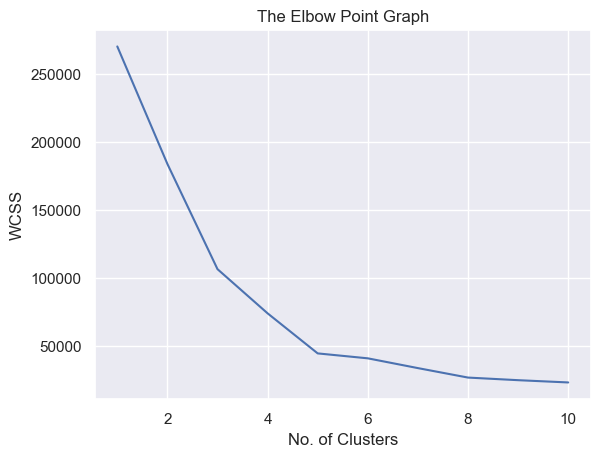

In [47]:
sns.set()

plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

### Here we got two Clusters values where elbow points shown : 3 and 5
### We took Clusters Value as 5 which is optimum for this.

# Now Traning the K-Means Clustering Model

In [55]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data count based on thier cluster

y = kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualizing all the Clusters

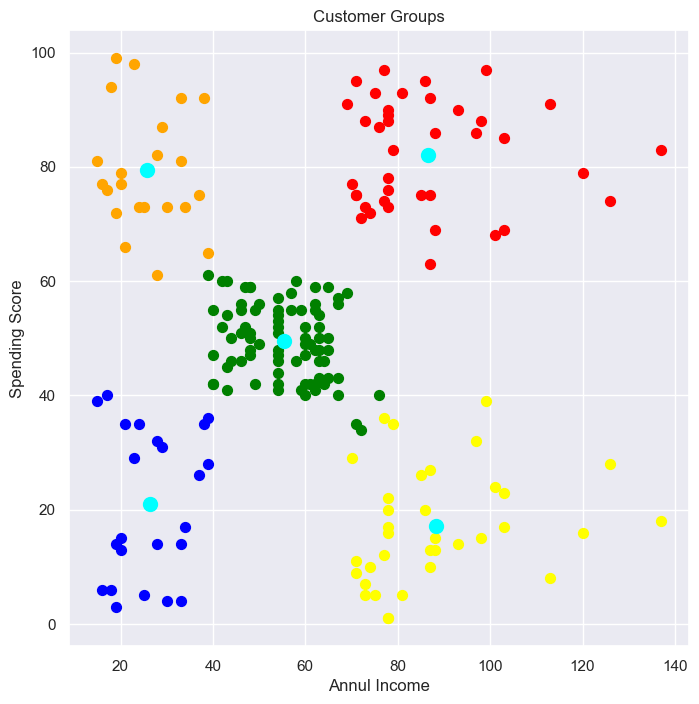

In [62]:
# Showing all the clusters and their Centriods

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='Green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='orange', label='Cluster 5')

# plot the centroid

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c='cyan', label='Centroid')

plt.title('Customer Groups')
plt.xlabel('Annul Income')
plt.ylabel('Spending Score')
plt.show()

In [66]:
from sklearn.cluster import KMeans
import joblib

# assume X is your 2‑col array of income & score
kmeans = KMeans(n_clusters=5, random_state=42).fit(x)
joblib.dump(kmeans, 'kmeans_model.joblib')


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


['kmeans_model.joblib']

In [70]:
import joblib

# Load your pre‑trained model
kmeans = joblib.load('kmeans_model.joblib')

new_samples = [
    [50, 60],   # Customer A: income=50k, score=60
    [85, 20]    # Customer B: income=85k, score=20
]

# Predict their cluster labels
labels = kmeans.predict(new_samples)
print(labels)   


[0 3]
